In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from pandas import Series, DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import patsy

In [2]:
df=pd.read_csv("zingat_house_price_prediction.csv",index_col=0)

In [3]:
df.head()

,İLAN_ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA_SALON_SAYISI,ODA_SAYISI,KREDI_UYGUNLUGU
0,Karşıyaka Goncalar Mah Girne Bulvarı Yakını Sa...,Goncalar Karşıyaka\n İzmir,3.750.000,97,110,3+1,3,Evet
1,RE/MAX Target'tan Karşıyaka Aksoyda Sıfır Daire,Aksoy Karşıyaka\n İzmir,8.635.000,80,100,3+1,3,Hayır
2,BORNOVA TURYAP'TAN KARŞIYAKA BAHÇELİ EVLERDE 3...,Bahçelievler Karşıyaka\n İzmir,4.650.000,140,160,3+1,3,Evet
3,Remax Target Ayşe Ayhandan Demirköprü de satıl...,Şemikler Karşıyaka\n İzmir,8.700.000,145,160,4+2,4,Evet
4,Karşıyaka Bostanlı'da Satılık Ebeveyn Banyolu ...,Bostanlı Karşıyaka\n İzmir,5.950.000,120,130,3+1,3,Evet


In [4]:
df.isnull().sum()

İLAN_ADI            0
MAHALLE             0
FİYAT               0
NET(m²)             0
BRÜT(m²)            0
ODA_SALON_SAYISI    0
ODA_SAYISI          0
KREDI_UYGUNLUGU     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   İLAN_ADI          42 non-null     object
 1   MAHALLE           42 non-null     object
 2   FİYAT             42 non-null     object
 3   NET(m²)           42 non-null     int64 
 4   BRÜT(m²)          42 non-null     int64 
 5   ODA_SALON_SAYISI  42 non-null     object
 6   ODA_SAYISI        42 non-null     object
 7   KREDI_UYGUNLUGU   42 non-null     object
dtypes: int64(2), object(6)
memory usage: 3.0+ KB


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df['MAHALLE'] = df['MAHALLE'].str.replace('Karşıyaka\n', '', regex=False)

In [8]:
df['MAHALLE'] = df['MAHALLE'].str.replace('İzmir', '', regex=False)

In [9]:
df.MAHALLE

0          Goncalar  
1             Aksoy  
2      Bahçelievler  
3          Şemikler  
4          Bostanlı  
5      Bahriye Üçok  
6             Aksoy  
7          Şemikler  
8          Örnekköy  
9           Atakent  
10             Yalı  
11     Bahriye Üçok  
12            Aksoy  
13          İmbatlı  
14             Yalı  
15        Mavişehir  
16       Demirköprü  
17    Mustafa Kemal  
18    Mustafa Kemal  
19         Dedebaşı  
20            İnönü  
21             Yalı  
22        Mavişehir  
23            İnönü  
24        Mavişehir  
25             Yalı  
26        Mavişehir  
27        Mavişehir  
28        Mavişehir  
29         Dedebaşı  
30             Yalı  
31             Tuna  
32         Bostanlı  
33         Dedebaşı  
34          İmbatlı  
35         Şemikler  
36          İmbatlı  
37         Bostanlı  
38             Yalı  
39             Yalı  
40         Bostanlı  
41         Bostanlı  
Name: MAHALLE, dtype: object

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.KREDI_UYGUNLUGU.unique()

array(['Evet', 'Hayır'], dtype=object)

In [12]:
df.FİYAT.unique()

array(['3.750.000', '8.635.000', '4.650.000', '8.700.000', '5.950.000',
       '3.150.000', '3.800.000', '2.480.000', '2.350.000', '5.790.000',
       '2.900.000', '5.195.000', '2.750.000', '5.250.000', '5.750.000',
       '11.000.000', '3.200.000', '11.500.000', '3.600.000', '3.475.000',
       '6.100.000', '3.950.000', '7.100.000', '5.000.000', '6.850.000',
       '7.950.000', '5.600.000', '2.450.000', '4.500.000', '1.575.000',
       '3.500.000', '3.100.000', '2.600.000', '3.350.000', '7.600.000',
       '2.850.000', '11.100.000', '3.990.000'], dtype=object)

In [13]:
df.MAHALLE.unique()

array(['Goncalar  ', 'Aksoy  ', 'Bahçelievler  ', 'Şemikler  ',
       'Bostanlı  ', 'Bahriye Üçok  ', 'Örnekköy  ', 'Atakent  ',
       'Yalı  ', 'İmbatlı  ', 'Mavişehir  ', 'Demirköprü  ',
       'Mustafa Kemal  ', 'Dedebaşı  ', 'İnönü  ', 'Tuna  '], dtype=object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   İLAN_ADI          42 non-null     object
 1   MAHALLE           42 non-null     object
 2   FİYAT             42 non-null     object
 3   NET(m²)           42 non-null     int64 
 4   BRÜT(m²)          42 non-null     int64 
 5   ODA_SALON_SAYISI  42 non-null     object
 6   ODA_SAYISI        42 non-null     object
 7   KREDI_UYGUNLUGU   42 non-null     object
dtypes: int64(2), object(6)
memory usage: 3.0+ KB


In [15]:
df.head()

,İLAN_ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA_SALON_SAYISI,ODA_SAYISI,KREDI_UYGUNLUGU
0,Karşıyaka Goncalar Mah Girne Bulvarı Yakını Sa...,Goncalar,3.750.000,97,110,3+1,3,Evet
1,RE/MAX Target'tan Karşıyaka Aksoyda Sıfır Daire,Aksoy,8.635.000,80,100,3+1,3,Hayır
2,BORNOVA TURYAP'TAN KARŞIYAKA BAHÇELİ EVLERDE 3...,Bahçelievler,4.650.000,140,160,3+1,3,Evet
3,Remax Target Ayşe Ayhandan Demirköprü de satıl...,Şemikler,8.700.000,145,160,4+2,4,Evet
4,Karşıyaka Bostanlı'da Satılık Ebeveyn Banyolu ...,Bostanlı,5.950.000,120,130,3+1,3,Evet


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   İLAN_ADI          42 non-null     object
 1   MAHALLE           42 non-null     object
 2   FİYAT             42 non-null     object
 3   NET(m²)           42 non-null     int64 
 4   BRÜT(m²)          42 non-null     int64 
 5   ODA_SALON_SAYISI  42 non-null     object
 6   ODA_SAYISI        42 non-null     object
 7   KREDI_UYGUNLUGU   42 non-null     object
dtypes: int64(2), object(6)
memory usage: 3.0+ KB


In [17]:
df.ODA_SALON_SAYISI.value_counts()

ODA_SALON_SAYISI
3+1                                20
2+1                                11
Klima                               4
4+1                                 2
4+2                                 1
1+1                                 1
Merkezi Sistem (Isı Payı Ölçer)     1
4                                   1
5                                   1
Name: count, dtype: int64

In [18]:
df.ODA_SALON_SAYISI.unique()

array(['3+1', '4+2', '2+1', '4+1', '1+1', 'Klima',
       'Merkezi Sistem (Isı Payı Ölçer)', '4', '5'], dtype=object)

In [19]:
df[df.ODA_SALON_SAYISI=="Klima"]

,İLAN_ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA_SALON_SAYISI,ODA_SAYISI,KREDI_UYGUNLUGU
25,Karşıyaka Mavişehir Siena Evleri Eşyalı Boş Sa...,Yalı,5.000.000,68,81,Klima,K,Evet
26,Karşıyaka Mavişehir Modda Residence Satılık 2+...,Mavişehir,6.850.000,82,118,Klima,K,Evet
28,Karşıyaka Mavişehir Park Yaşam Satılık 1+1 Dai...,Mavişehir,5.600.000,68,86,Klima,K,Evet
30,Karşıyaka Mavişehir Yalı Mah Doğa Koleji Arkas...,Yalı,4.500.000,112,150,Klima,K,Evet


In [20]:
df[df.ODA_SALON_SAYISI=="Merkezi Sistem (Isı Payı Ölçer)"]

,İLAN_ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA_SALON_SAYISI,ODA_SAYISI,KREDI_UYGUNLUGU
27,Karşıyaka Mavişehir Modda Residence Bahçe Katı...,Mavişehir,7.950.000,98,145,Merkezi Sistem (Isı Payı Ölçer),M,Evet


In [21]:
unwanted_values = ['Klima', 'Merkezi Sistem (Isı Payı Ölçer)']
unwanted_rows = df[df['ODA_SALON_SAYISI'].isin(unwanted_values)].index

In [22]:
df.drop(unwanted_rows, inplace=True)

In [23]:
df.head()

,İLAN_ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA_SALON_SAYISI,ODA_SAYISI,KREDI_UYGUNLUGU
0,Karşıyaka Goncalar Mah Girne Bulvarı Yakını Sa...,Goncalar,3.750.000,97,110,3+1,3,Evet
1,RE/MAX Target'tan Karşıyaka Aksoyda Sıfır Daire,Aksoy,8.635.000,80,100,3+1,3,Hayır
2,BORNOVA TURYAP'TAN KARŞIYAKA BAHÇELİ EVLERDE 3...,Bahçelievler,4.650.000,140,160,3+1,3,Evet
3,Remax Target Ayşe Ayhandan Demirköprü de satıl...,Şemikler,8.700.000,145,160,4+2,4,Evet
4,Karşıyaka Bostanlı'da Satılık Ebeveyn Banyolu ...,Bostanlı,5.950.000,120,130,3+1,3,Evet


In [24]:
df.ODA_SALON_SAYISI.value_counts()

ODA_SALON_SAYISI
3+1    20
2+1    11
4+1     2
4+2     1
1+1     1
4       1
5       1
Name: count, dtype: int64

In [25]:
df.ODA_SAYISI.unique()

array(['3', '4', '2', '1', '5'], dtype=object)

In [26]:
fiyat_mahalle_df = pd.get_dummies(df, columns=["MAHALLE"], dtype=int)
fiyat_mahalle_df.drop(columns="ODA_SALON_SAYISI",inplace=True)
fiyat_mahalle_df.drop(columns="KREDI_UYGUNLUGU",inplace=True)
fiyat_mahalle_df.drop(columns="İLAN_ADI", inplace=True)
fiyat_mahalle_df

,FİYAT,NET(m²),BRÜT(m²),ODA_SAYISI,MAHALLE_Aksoy,MAHALLE_Atakent,MAHALLE_Bahriye Üçok,MAHALLE_Bahçelievler,MAHALLE_Bostanlı,MAHALLE_Dedebaşı,MAHALLE_Demirköprü,MAHALLE_Goncalar,MAHALLE_Mavişehir,MAHALLE_Mustafa Kemal,MAHALLE_Tuna,MAHALLE_Yalı,MAHALLE_Örnekköy,MAHALLE_İmbatlı,MAHALLE_İnönü,MAHALLE_Şemikler
0,3.750.000,97,110,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,8.635.000,80,100,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.650.000,140,160,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,8.700.000,145,160,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5.950.000,120,130,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,3.150.000,110,120,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,3.800.000,135,145,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2.480.000,65,75,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,2.350.000,120,140,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,5.790.000,110,130,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
ozellik_df = fiyat_mahalle_df.iloc[:,:-16]
ozellik_df

,FİYAT,NET(m²),BRÜT(m²),ODA_SAYISI
0,3.750.000,97,110,3
1,8.635.000,80,100,3
2,4.650.000,140,160,3
3,8.700.000,145,160,4
4,5.950.000,120,130,3
5,3.150.000,110,120,3
6,3.800.000,135,145,3
7,2.480.000,65,75,2
8,2.350.000,120,140,3
9,5.790.000,110,130,3


In [28]:
oda_salon = df.groupby("ODA_SALON_SAYISI").count().reset_index().iloc[:,:2]
oda_salon

,ODA_SALON_SAYISI,İLAN_ADI
0,1+1,1
1,2+1,11
2,3+1,20
3,4,1
4,4+1,2
5,4+2,1
6,5,1


In [29]:
## Exploratory Data Analysis

<Axes: title={'center': 'Karsiyaka ev fiyatlari dagilimi'}, xlabel='FİYAT', ylabel='Count'>

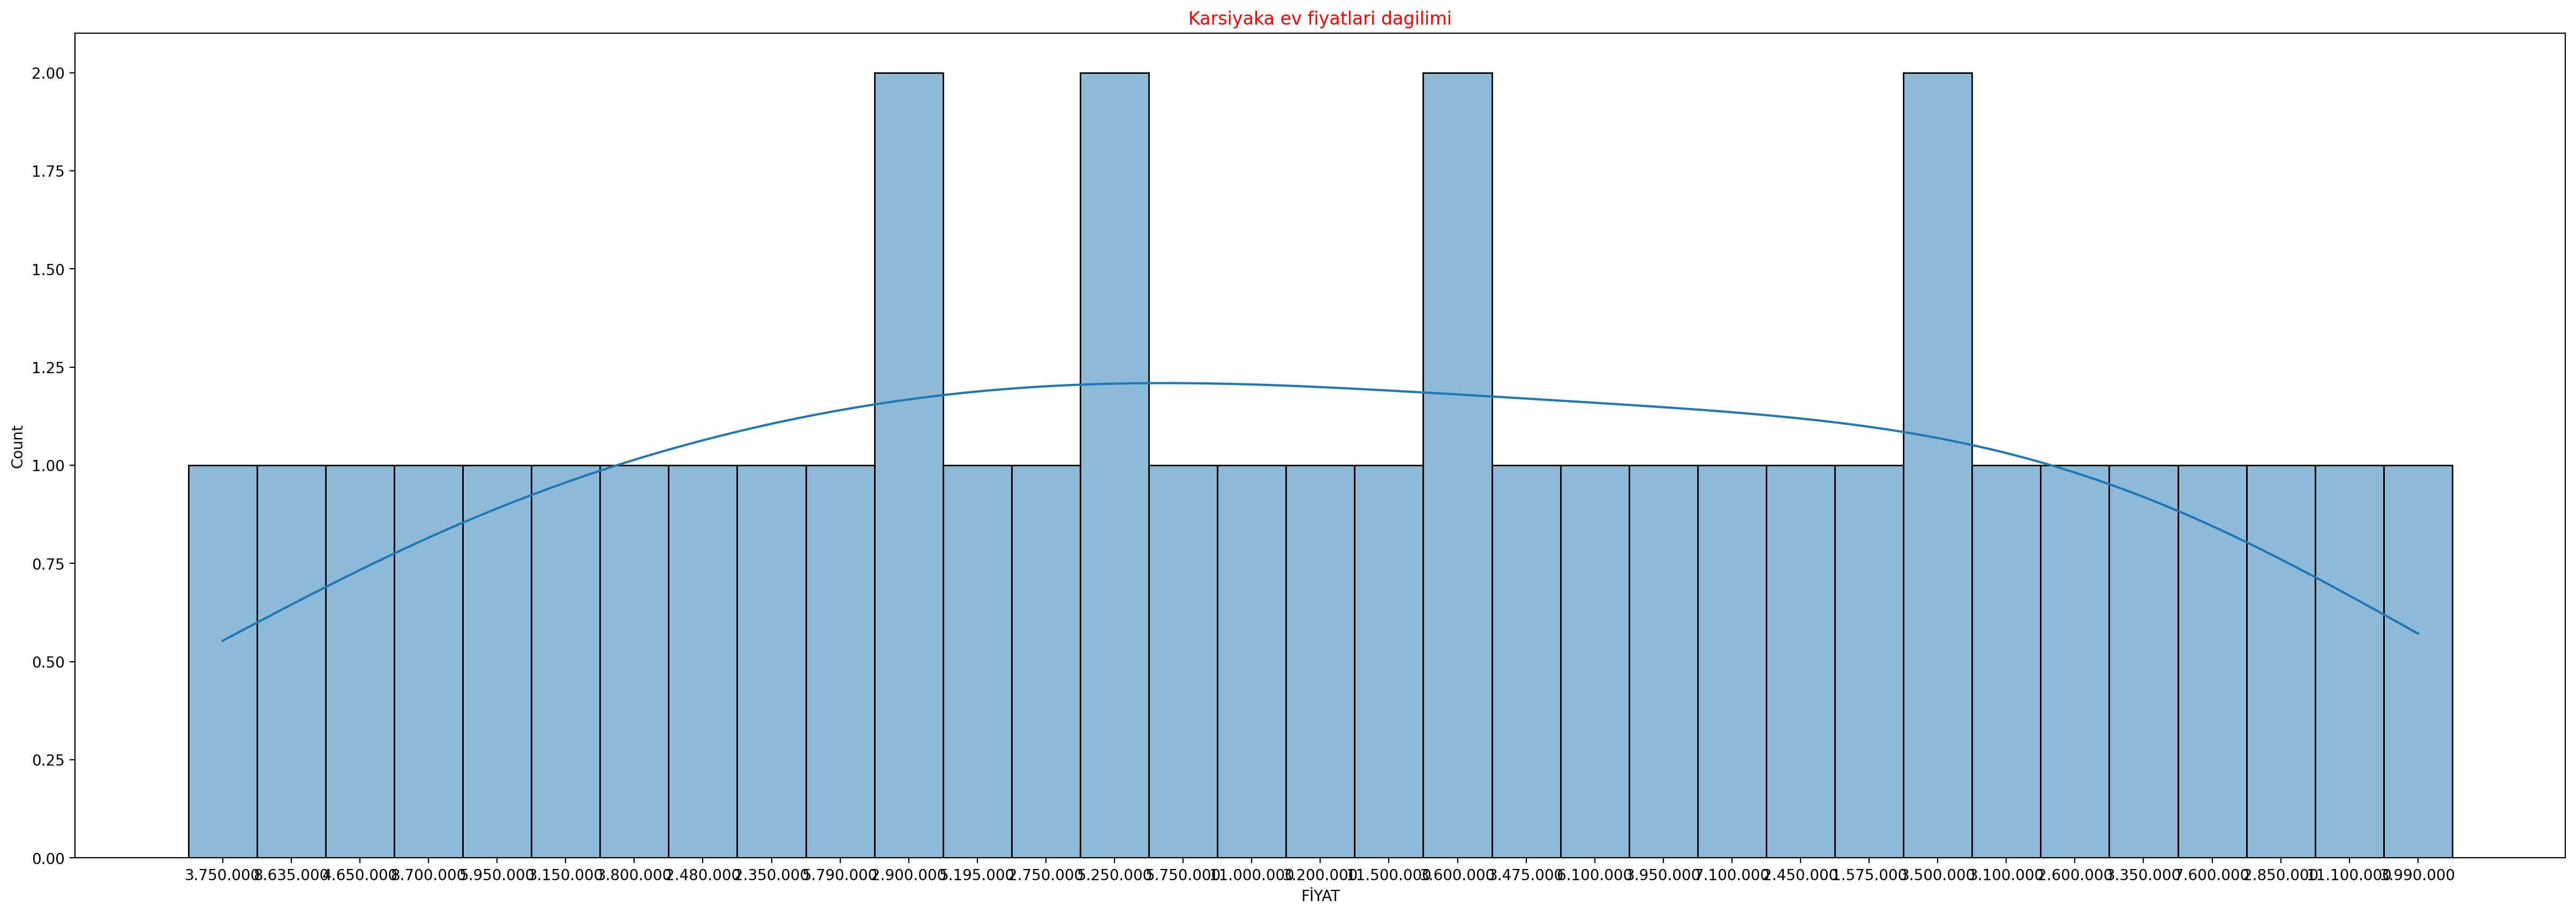

In [30]:
plt.figure(figsize=(30,10),dpi=200)
plt.title("Karsiyaka ev fiyatlari dagilimi", c="red")
sns.histplot(data=df, x="FİYAT", kde=True)

Text(0, 0.5, 'İLAN SAYISI')

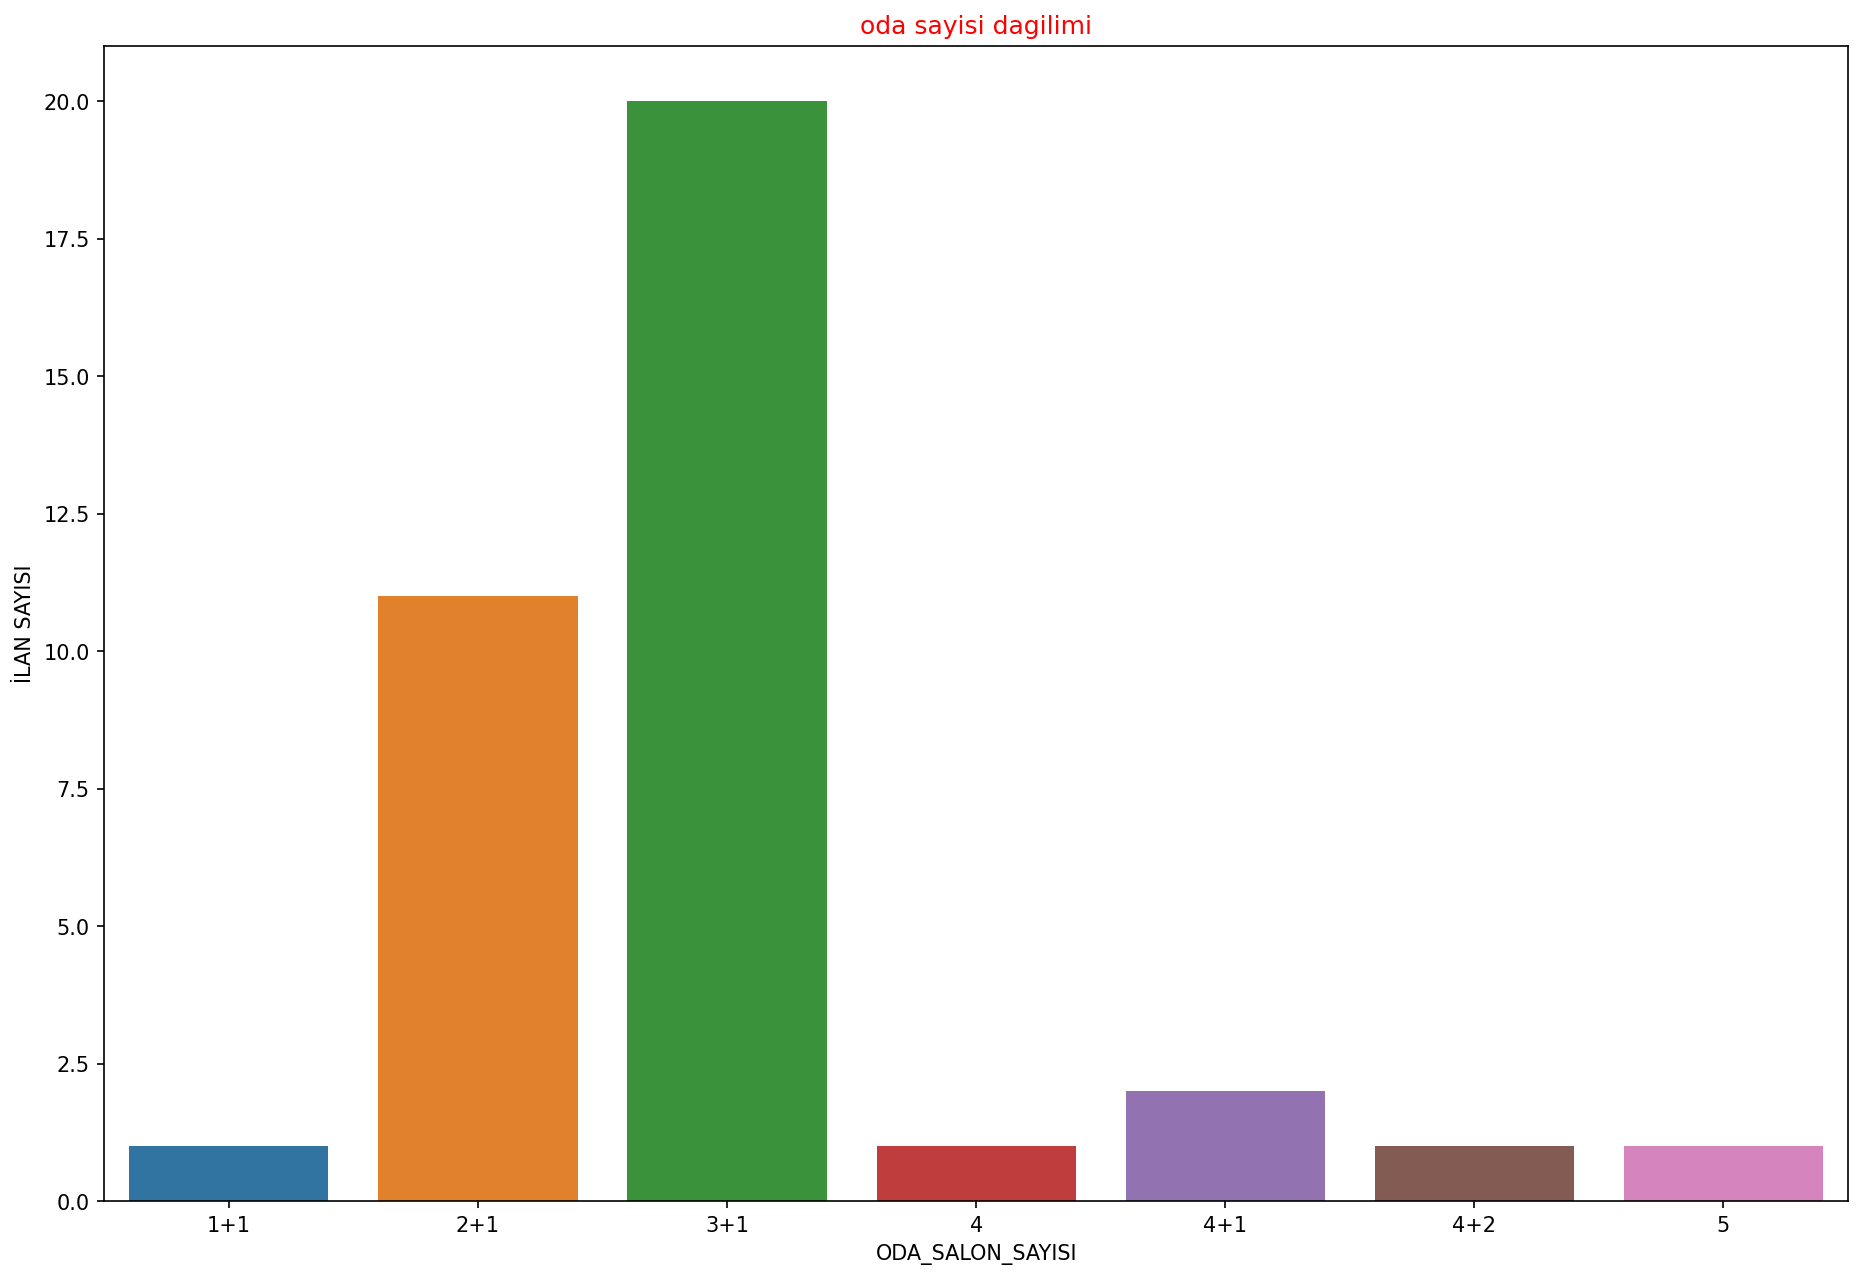

In [31]:
plt.figure(figsize=(15,10),dpi=150)
plt.title("oda sayisi dagilimi", c="red")
sns.barplot(x = 'ODA_SALON_SAYISI', y = 'İLAN_ADI', data = oda_salon)
plt.ylabel("İLAN SAYISI")

In [32]:
mahalle = df.groupby("MAHALLE").count().iloc[:,0:1].reset_index().head(10)
mahalle_sort = mahalle.sort_values("İLAN_ADI", ascending=False)
mahalle_sort

,MAHALLE,İLAN_ADI
4,Bostanlı,5
0,Aksoy,3
5,Dedebaşı,3
8,Mavişehir,3
2,Bahriye Üçok,2
9,Mustafa Kemal,2
1,Atakent,1
3,Bahçelievler,1
6,Demirköprü,1
7,Goncalar,1


Text(0, 0.5, 'İLAN_SAYISI')

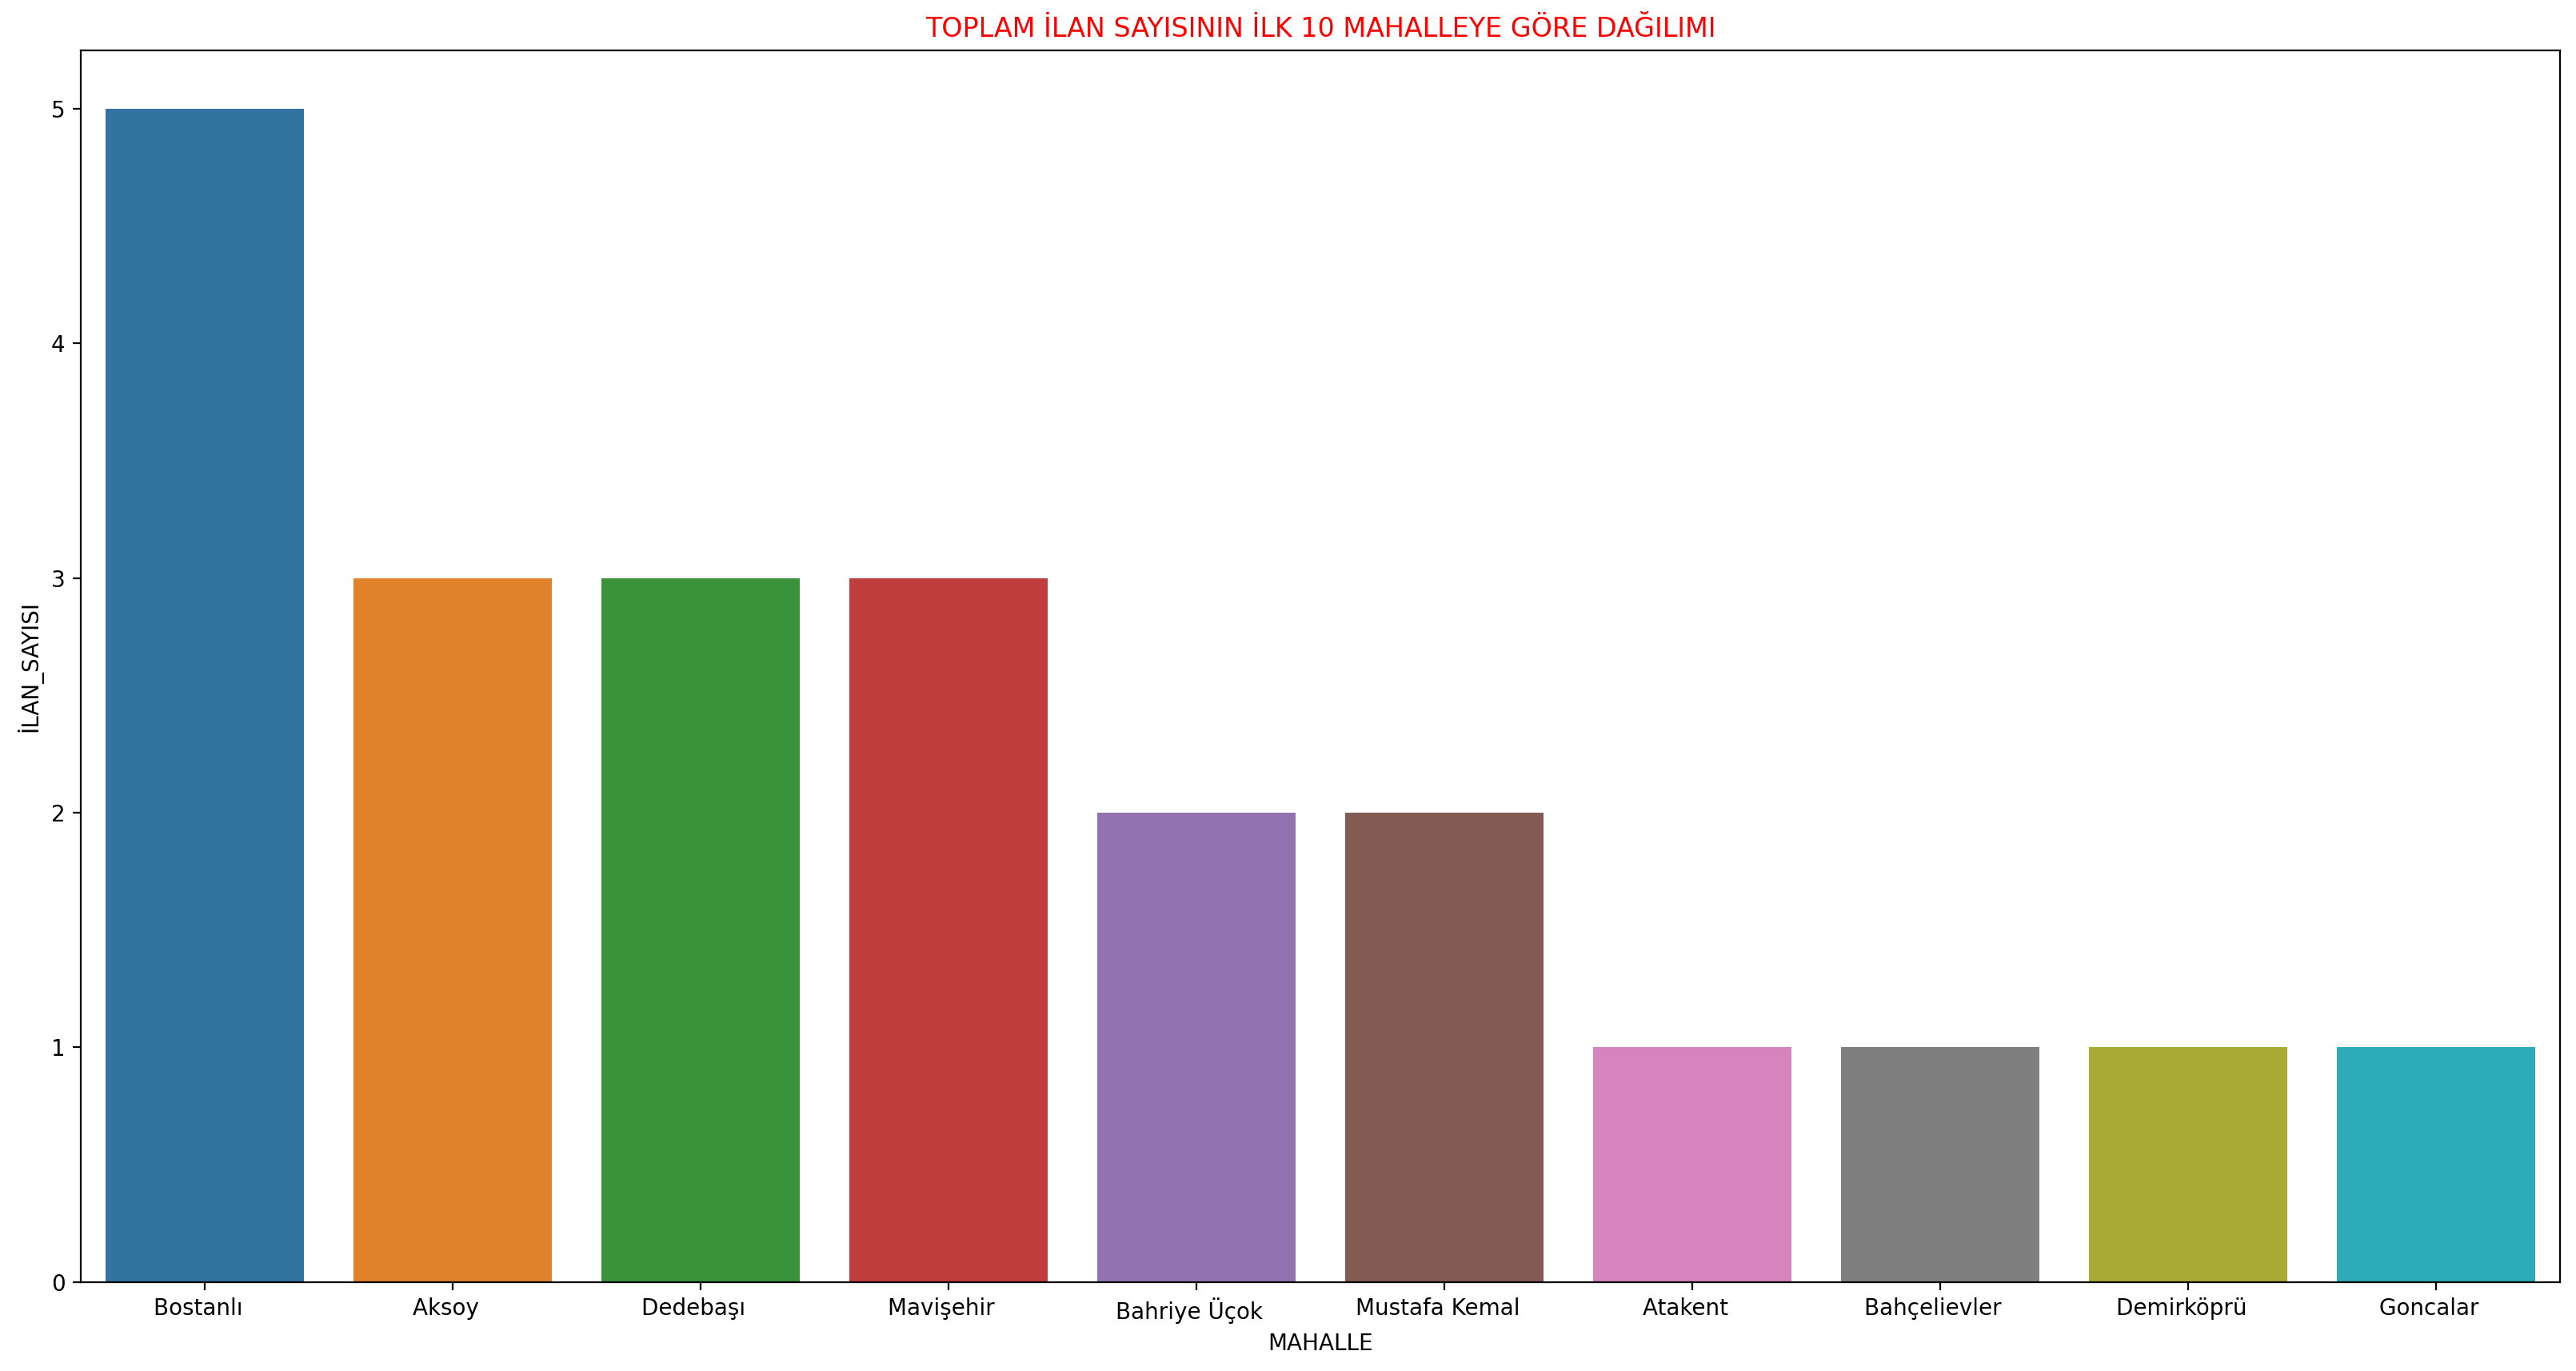

In [33]:
plt.figure(figsize=(20,10),dpi=200)
plt.title("TOPLAM İLAN SAYISININ İLK 10 MAHALLEYE GÖRE DAĞILIMI", c="red")
sns.barplot(x = 'MAHALLE', y = 'İLAN_ADI', data = mahalle_sort)
plt.ylabel("İLAN_SAYISI")

<Axes: title={'center': 'Karsiyaka ev fiyatlari dagilimi'}, xlabel='KREDI_UYGUNLUGU', ylabel='Count'>

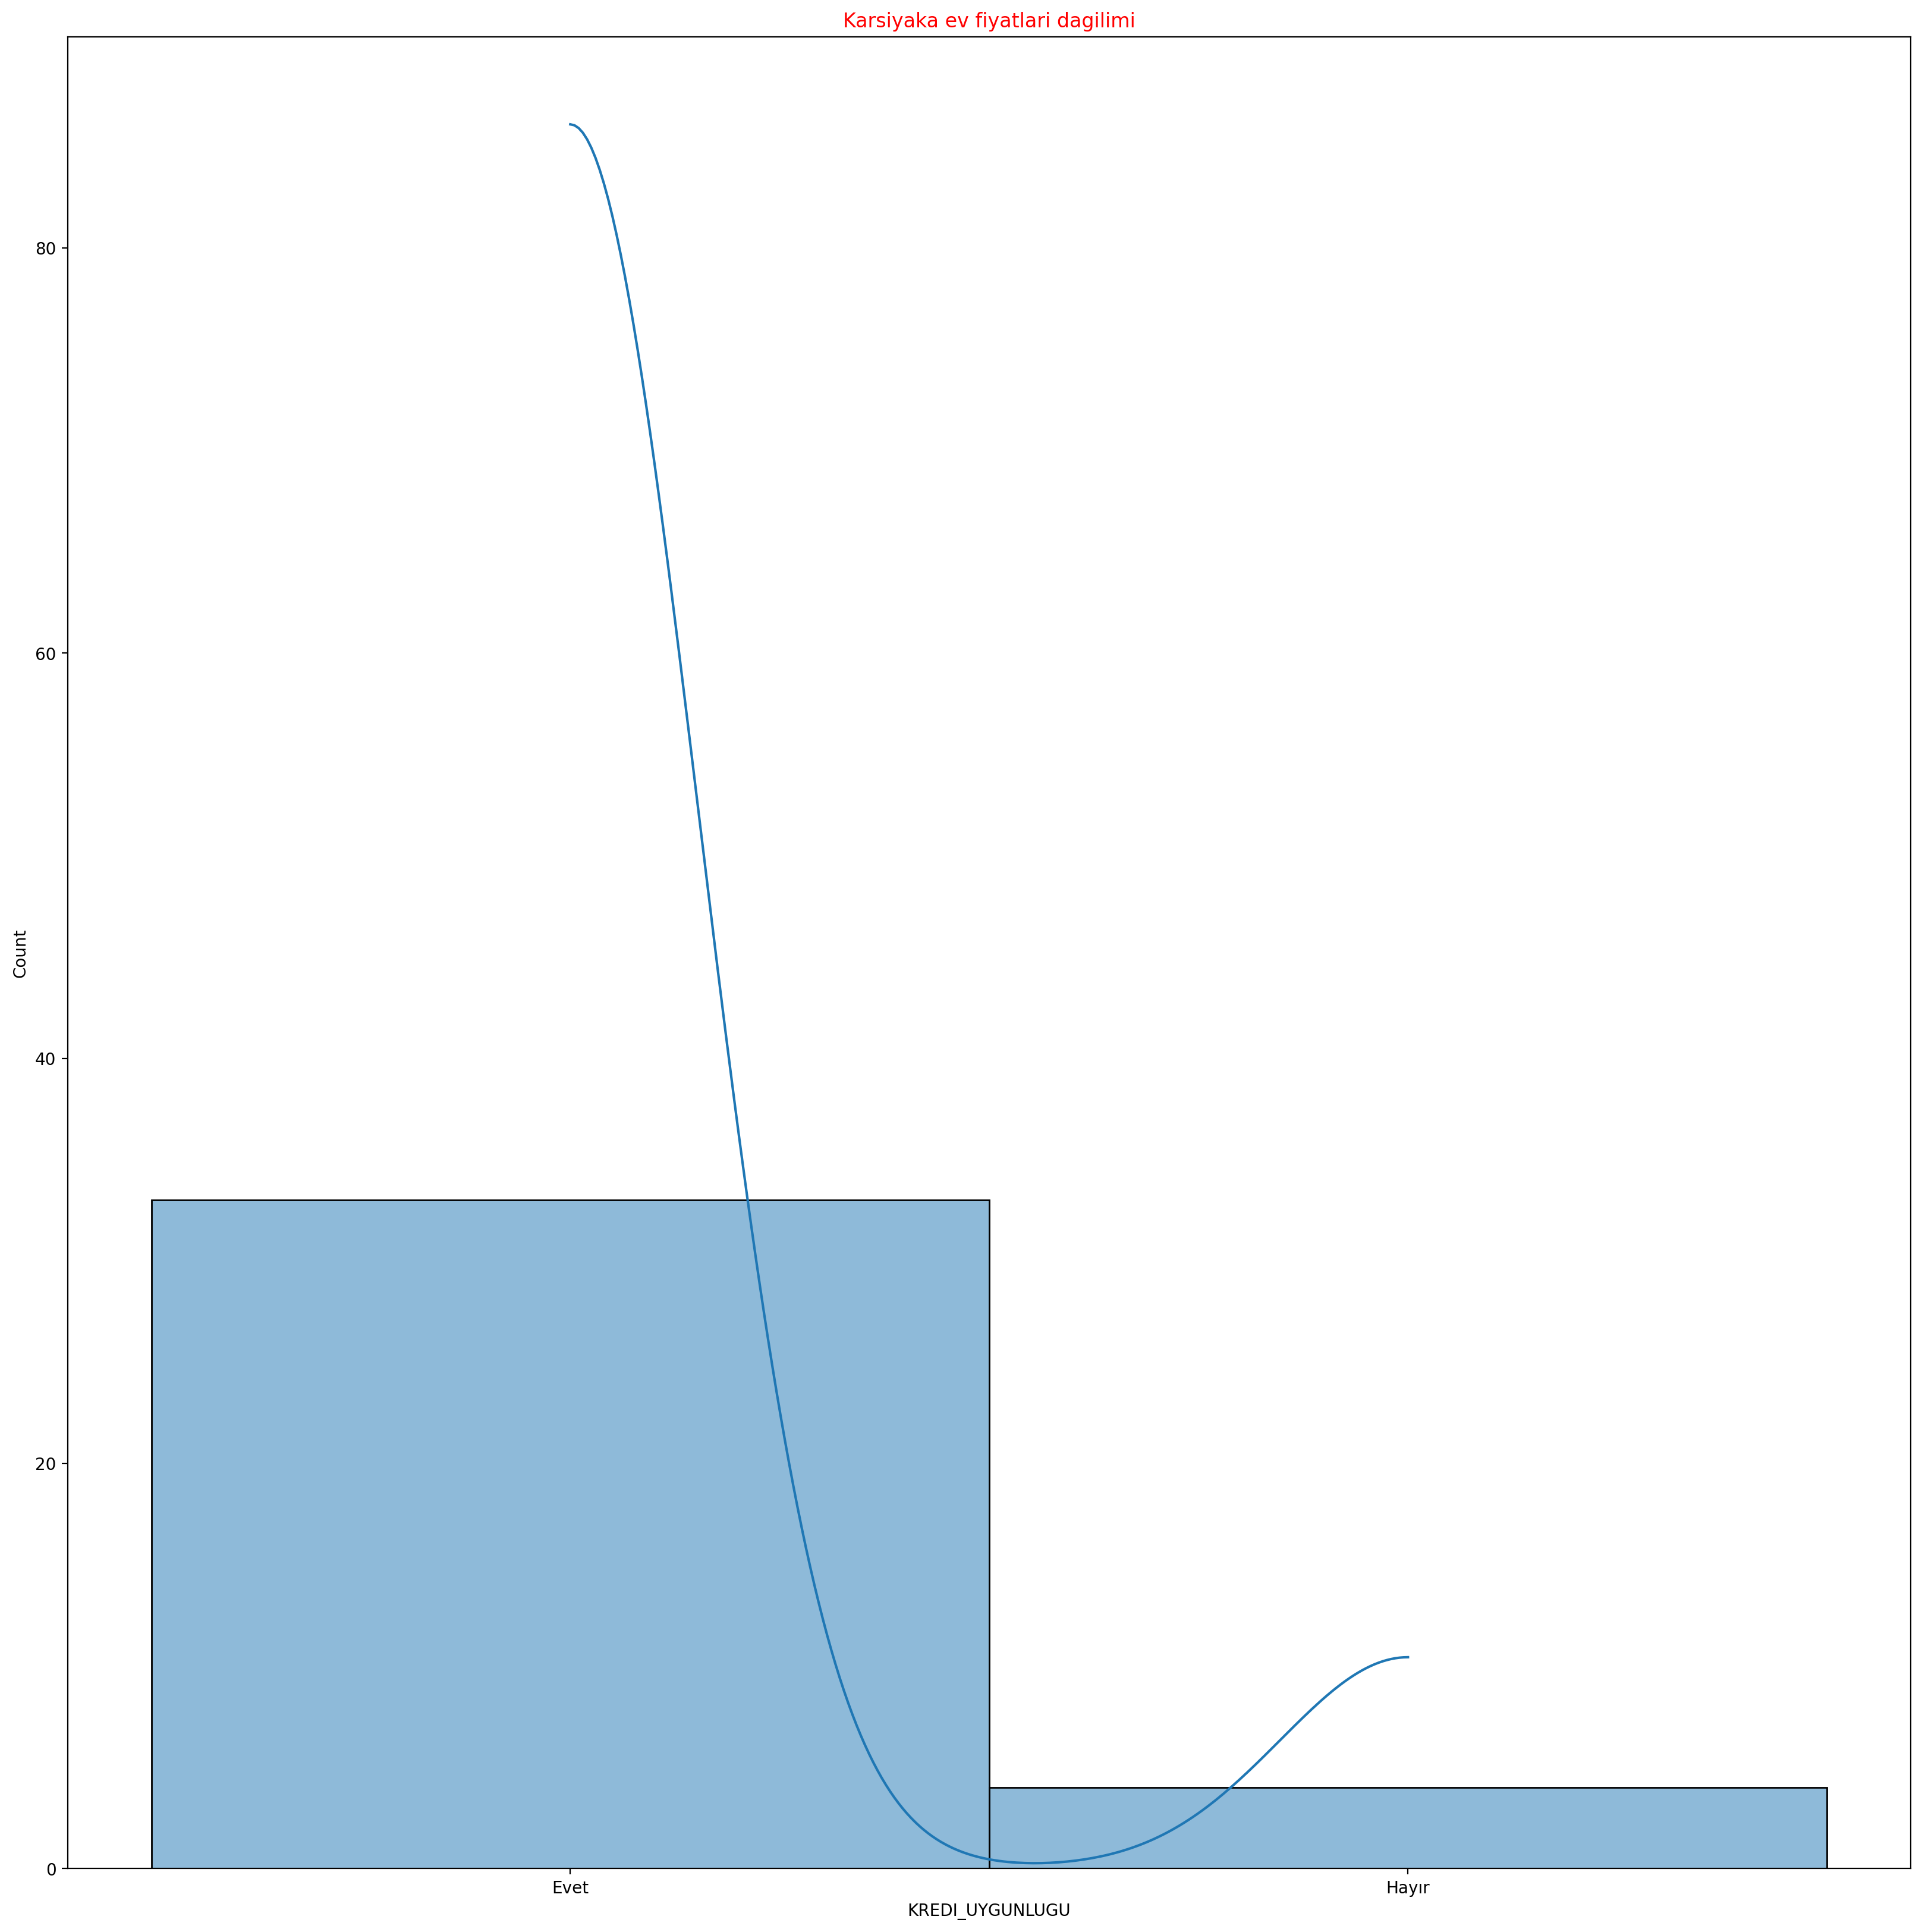

In [34]:
plt.figure(figsize=(20,20),dpi=200)
plt.title("Karsiyaka ev fiyatlari dagilimi", c="red")
sns.histplot(data=df, x="KREDI_UYGUNLUGU", kde=True)